In [1]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [4]:
import sys
from pathlib import Path
import torch
import numpy as np
import tqdm

# Plotting
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('bioAI.mplstyle')

'''
CUSTOM PACKAGES
'''
# avoid adding multiple relave paths to sys.path
sys.path.append("../src") if "../src" not in sys.path else None

from Models import SorscherRNN
from Experiment import Experiment
from datahandling import Dataset, MESampler
from plotting_functions import *
from synthetic_grid_cells import *
from methods import *
from stats import *

In [5]:
#base_path = Path("/storA/GridCells/")
base_path = "/mnt/WD12TB-HDD"
experiment = Experiment(name="gg-3ME", base_path=base_path)
experiment.setup()

Experiment <gg-3ME> already EXISTS. Loading experiment settings!
Loading experiment details
This experiment has ALREADY been setup - SKIPPING.


False

In [15]:
# Load ratemaps
ratemaps = []
for env_i in tqdm.trange(3):
    ratemap_i_path = experiment.paths['ratemaps'] / f'env_{env_i}'
    ratemap_i_path /= filenames(ratemap_i_path)[-1]
    with open(ratemap_i_path, 'rb') as f:
        ratemaps_env_i = pickle.load(f)
    ratemaps.append(ratemaps_env_i)
ratemaps = np.array(ratemaps)

# Load module indices
module_indices = np.load(f"{experiment.paths['experiment']}/module_indices.npz")
print(module_indices.files)
module_indices = module_indices['C5_from_env_2']

100%|██████████| 3/3 [00:00<00:00, 22.83it/s]


['C0_from_env_0', 'C1_from_env_1', 'C5_from_env_2']


In [16]:
ratemaps.shape, module_indices

((3, 4096, 64, 64),
 array([  34,   76,   91,  100,  127,  146,  157,  194,  216,  222,  223,
         245,  246,  249,  254,  282,  298,  309,  321,  322,  330,  385,
         398,  400,  408,  412,  435,  440,  460,  501,  509,  522,  526,
         529,  540,  560,  565,  577,  583,  594,  622,  641,  648,  696,
         712,  715,  730,  734,  736,  788,  799,  804,  812,  839,  844,
         861,  912,  915,  921,  925,  926,  929,  942,  974,  981,  984,
         994,  997,  998, 1006, 1012, 1016, 1020, 1021, 1042, 1053, 1055,
        1056, 1073, 1090, 1091, 1092, 1103, 1115, 1123, 1135, 1139, 1177,
        1182, 1188, 1199, 1203, 1209, 1216, 1222, 1228, 1231, 1268, 1270,
        1291, 1295, 1303, 1309, 1312, 1349, 1371, 1379, 1381, 1388, 1390,
        1397, 1404, 1408, 1418, 1428, 1435, 1436, 1443, 1446, 1461, 1465,
        1489, 1529, 1540, 1541, 1544, 1560, 1575, 1581, 1582, 1590, 1601,
        1640, 1648, 1654, 1655, 1673, 1686, 1688, 1713, 1804, 1821, 1827,
        1830, 1839

In [33]:
ratemaps.shape

(3, 4096, 64, 64)

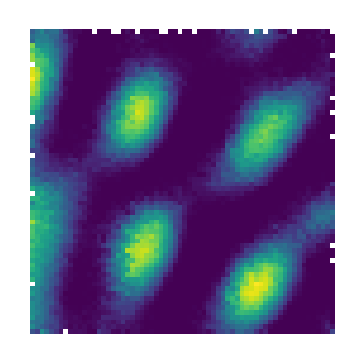

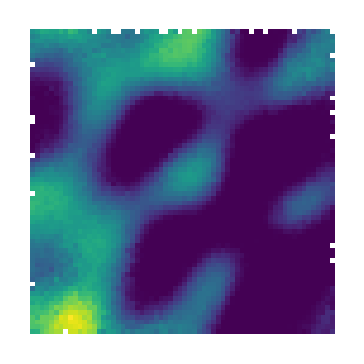

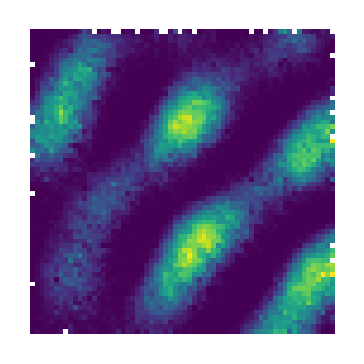

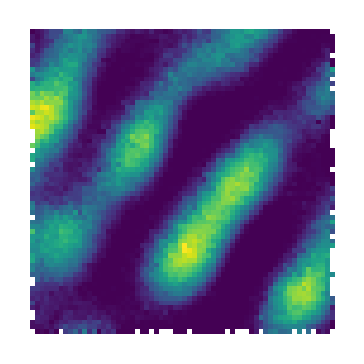

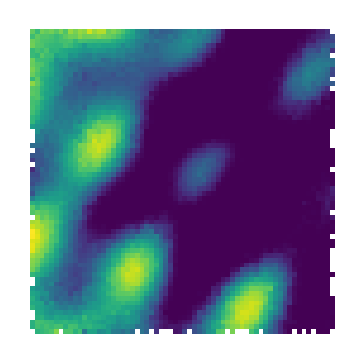

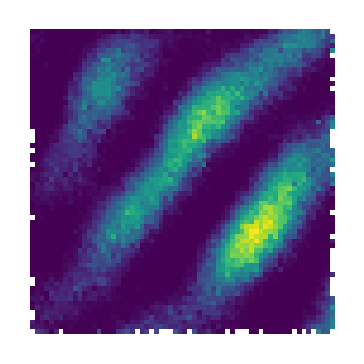

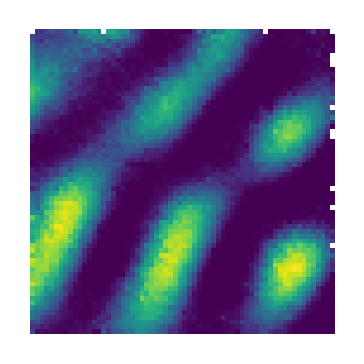

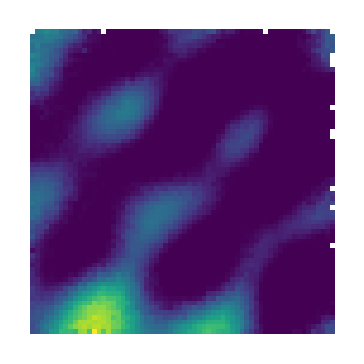

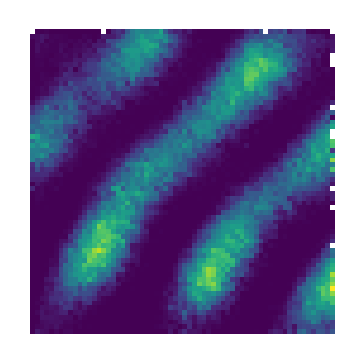

In [44]:
figsize = (12.5/12,12.5/12)
padding=-0.025
num_cells = 3
for env_i in range(ratemaps.shape[0]):
    for cell_i in range(0,0+num_cells):
        fig, ax = plt.subplots(figsize=figsize,dpi=300)
        ax.imshow(ratemaps[env_i, module_indices[cell_i]].T, origin='lower')
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        ax.axis('off')
        ax.set_position([-padding, -padding, 1+padding, 1+padding])
        fig.savefig(experiment.paths['experiment'] / f'plots/grid-remapping-ratemap-{env_i}-{cell_i}.svg')

In [46]:
ratemaps[0,module_indices].shape

(315, 64, 64)

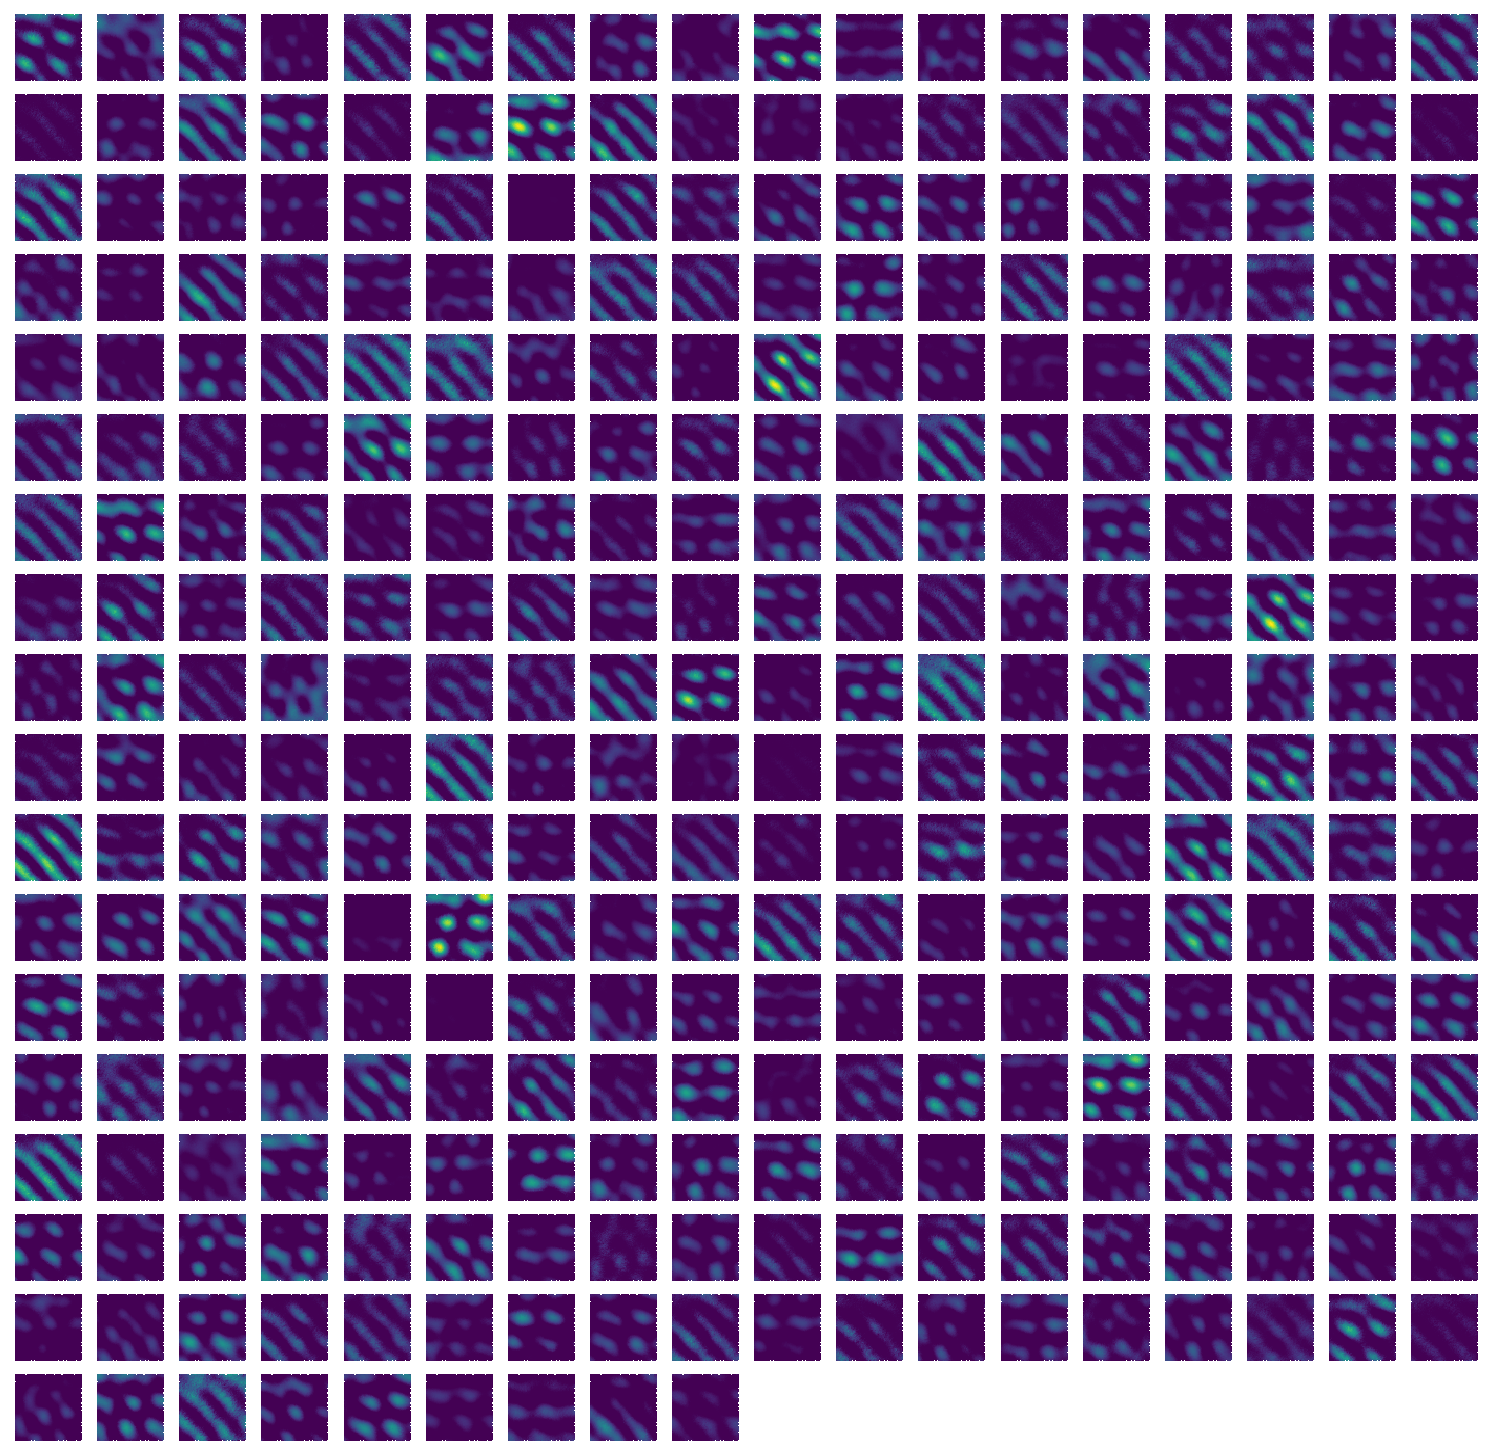

In [29]:
multiimshow(ratemaps[0, module_indices]);

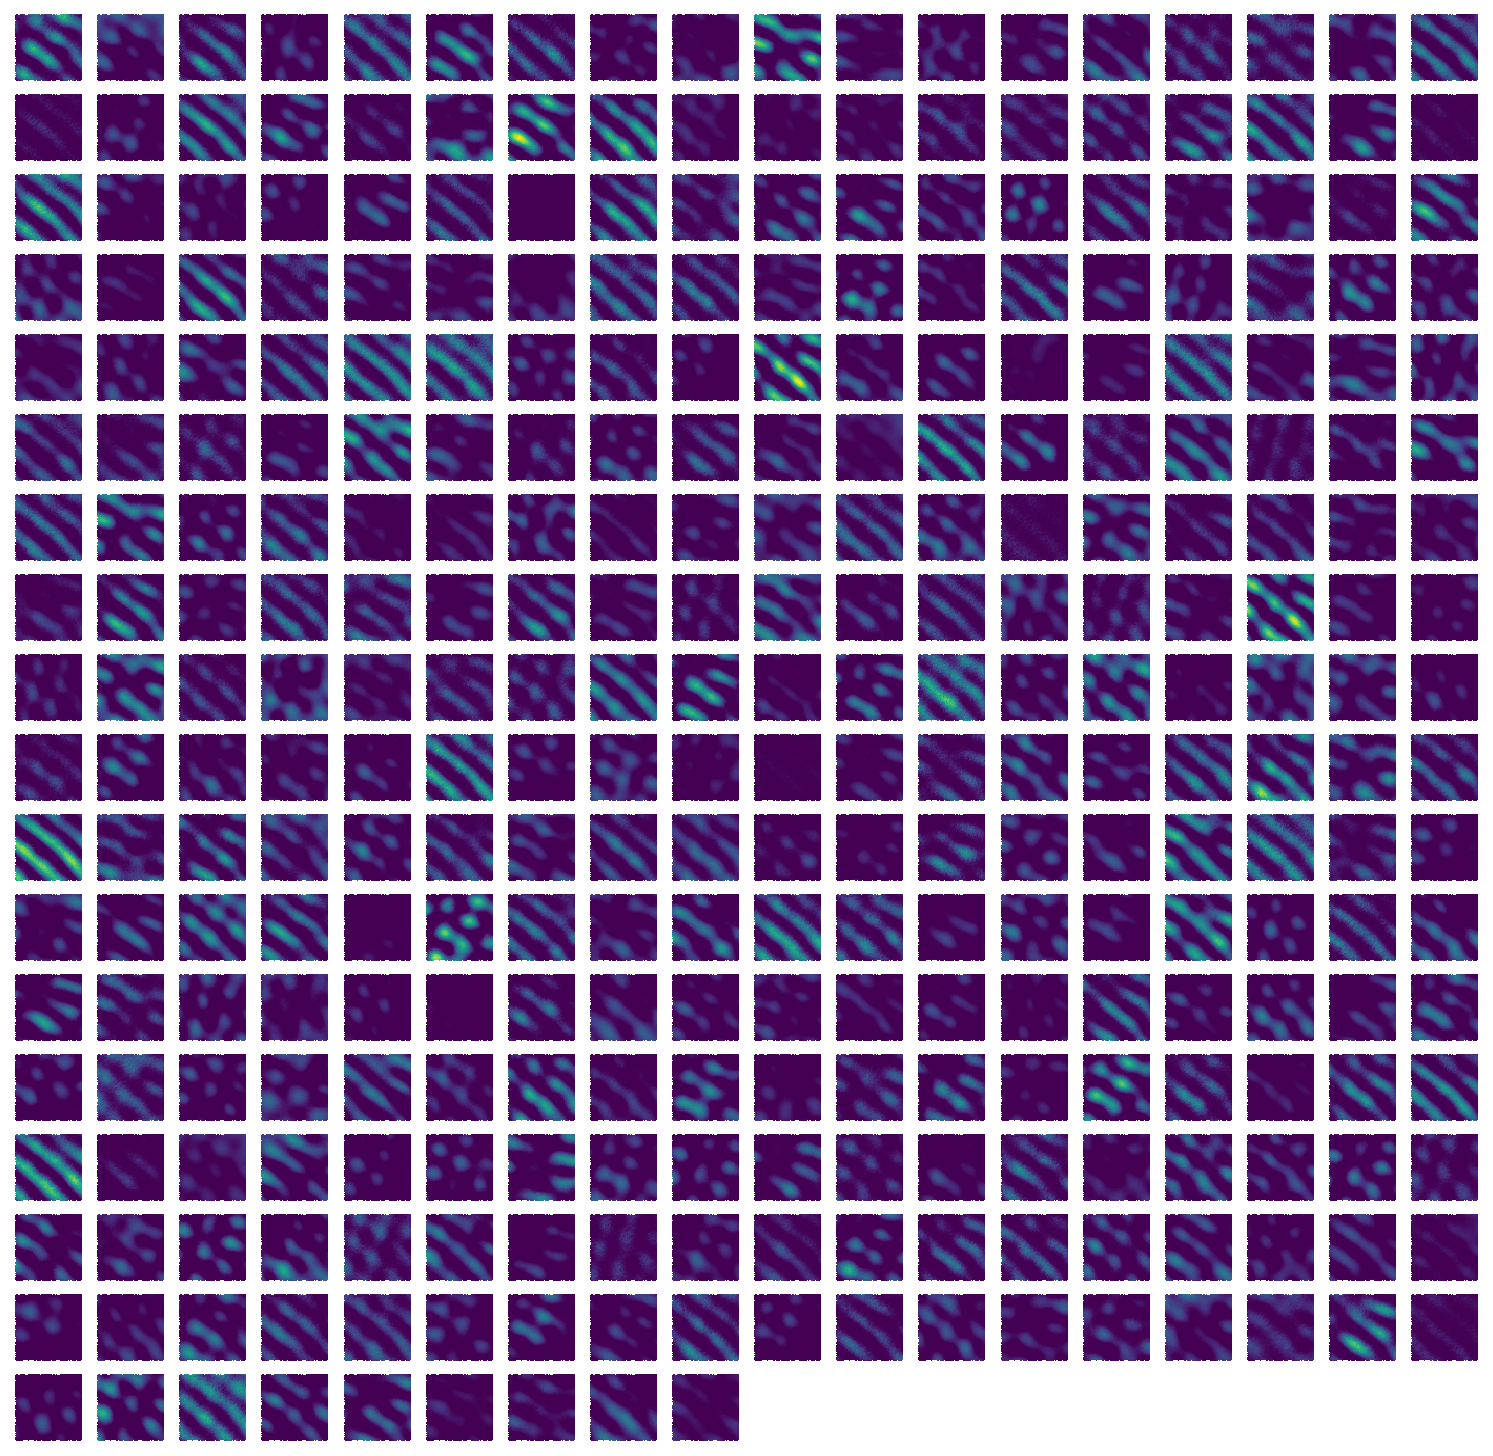

In [30]:
multiimshow(ratemaps[1, module_indices]);

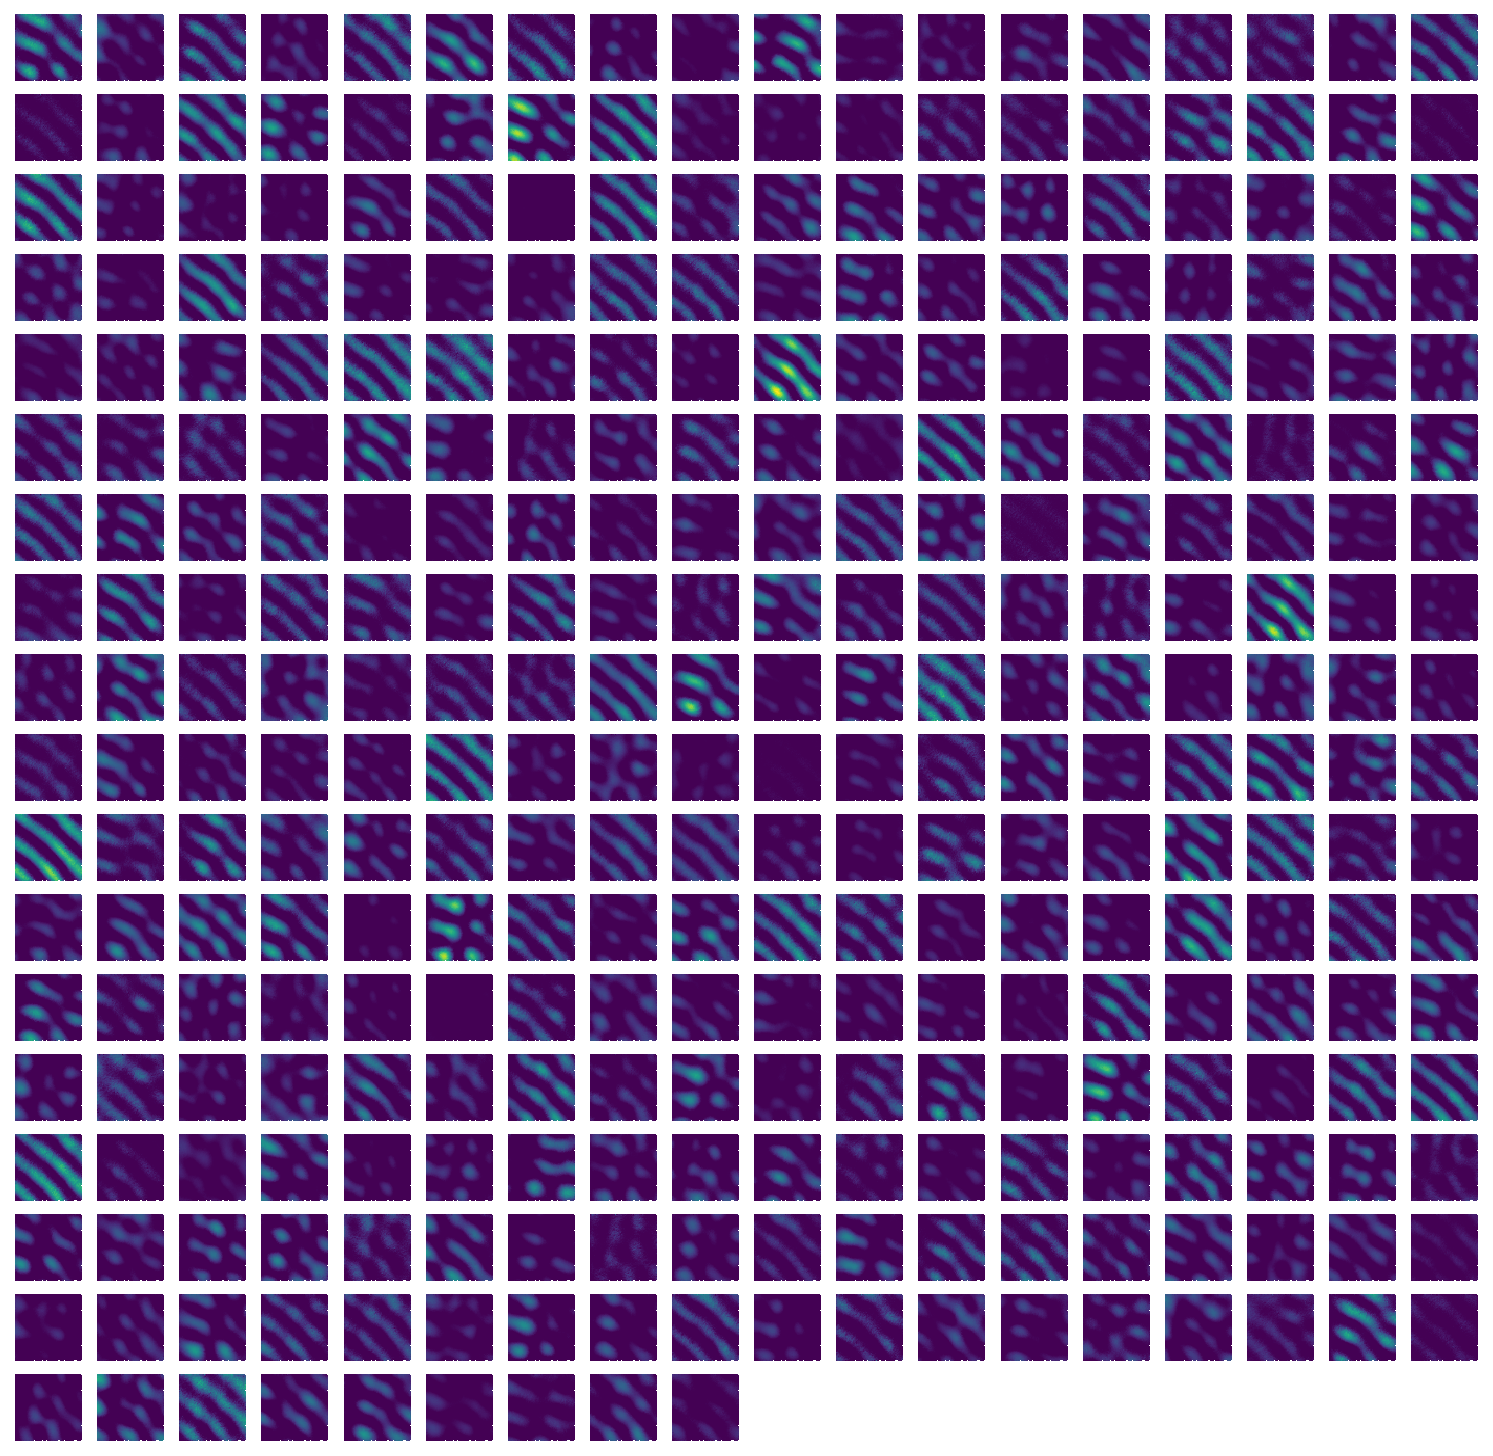

In [31]:
multiimshow(ratemaps[2, module_indices]);

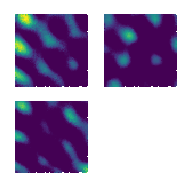

In [32]:
multiimshow(ratemaps[2, module_indices[26:26+3]]);